In [463]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc

#读取数据
train_df = pd.read_csv(r'C:\Users\86130\Desktop\ML算法竞赛\讯飞\水泵状态监测与故障诊断挑战赛公开数据\train.csv')
test_df = pd.read_csv(r'C:\Users\86130\Desktop\ML算法竞赛\讯飞\水泵状态监测与故障诊断挑战赛公开数据\test.csv')

#合并数据
train_df['is_test'] = 0
test_df['is_test'] = 1
df_all = pd.concat([train_df,test_df],axis=0,ignore_index=True)

In [457]:
df_all[df_all['target']==1]

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x13*x37,x13/x37,x13+x12,x13-x12,x13*x12,x13/x12,x13+x14,x13-x14,x13*x14,x13/x14
1,1,-999.000000,40.820386,40.733584,39.626887,201.426291,99.999878,10.094722,12.606676,12.646451,...,0.0,0.0,0.000000,0.000000,0.0,0.0,420.518605,-420.518605,0.0,0.0
3,3,0.003935,46.627000,46.515356,42.925346,272.008102,0.000000,11.046010,-999.000000,11.103880,...,0.0,0.0,0.000000,0.000000,0.0,0.0,420.147191,-420.147191,0.0,0.0
6,6,0.001968,46.093750,46.180550,42.578125,271.776620,0.000000,11.082180,-999.000000,11.067710,...,0.0,0.0,0.000000,0.000000,0.0,0.0,419.114100,-419.114100,0.0,0.0
9,9,0.001968,47.482636,48.133678,44.531250,261.744909,0.000000,9.079153,11.390273,11.390425,...,0.0,0.0,0.000022,-0.000022,0.0,0.0,419.944326,-419.944326,0.0,0.0
10,10,-999.000000,38.932290,38.064240,35.894100,203.955429,0.000000,0.028935,0.036169,0.028935,...,0.0,0.0,0.000000,0.000000,0.0,0.0,408.404300,-408.404300,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199960,199960,-999.000000,36.935764,37.413190,35.156250,3.029514,99.999878,12.651910,15.082470,15.118630,...,0.0,0.0,0.000000,0.000000,0.0,0.0,419.078300,-419.078300,0.0,0.0
199963,199963,-999.000000,38.455488,38.962072,35.084966,3.608217,0.000000,0.024183,0.028935,0.028935,...,0.0,0.0,0.000000,0.000000,0.0,0.0,408.010469,-408.010469,0.0,0.0
199968,199968,-999.000000,45.722718,50.000000,44.748260,3.104745,99.999878,6.041852,0.036169,0.036169,...,0.0,0.0,0.000000,0.000000,0.0,0.0,407.485830,-407.485830,0.0,0.0
199975,199975,-999.000000,39.453125,37.887660,35.894100,202.165389,0.000000,0.022195,0.036169,0.028935,...,0.0,0.0,0.000000,0.000000,0.0,0.0,408.385796,-408.385796,0.0,0.0


In [464]:
df_all['x0_x1_x2_mean']=df_all[['x0','x1','x2']].mean(axis=1)
df_all['x0_x1_x2_skew']=df_all[['x0','x1','x2']].skew(axis=1)

df_all['x6_x7_x8_mean']=df_all[['x6','x7','x8']].mean(axis=1)
df_all['x6_x7_x8_skew']=df_all[['x6','x7','x8']].skew(axis=1)

df_all['x44_x45_x46_mean']=df_all[['x44','x45','x46']].mean(axis=1)
df_all['x44_x45_x46_skew']=df_all[['x44','x45','x46']].skew(axis=1)

for col in ['x0', 'x7', 'x43', 'x10', 'x13', 'x6', 'x35', 'x37', 'x12', 'x14']:
    df_all[f'{col}_log'] = np.log(df_all[col])
    df_all[f'{col}_**2'] = df_all[col]**2


for col_i in ['x0', 'x4', 'x43', 'x10', 'x13']:
    for col_j in ['x6', 'x35', 'x37', 'x12', 'x14']:
        df_all[f'{col_i}+{col_j}'] = df_all[col_i]+df_all[col_j]
        df_all[f'{col_i}-{col_j}'] = df_all[col_i]-df_all[col_j]
        df_all[f'{col_i}*{col_j}'] = df_all[col_i]*df_all[col_j]
        df_all[f'{col_i}/{col_j}'] = df_all[col_i]/df_all[col_j]



In [ ]:
#交叉统计
cat_cols = ['x0','x3','x7','x9','x49']
for i in cat_cols:
    for j in ['x41','x20']:
        df_all[f'{i}_{j}_mean'] = df_all[i].map(df_all.groupby([i])[j].mean())
        df_all[f'{i}_{j}_skew'] = df_all[i].map(df_all.groupby([i])[j].skew())
        df_all[f'{i}_{j}_max'] = df_all[i].map(df_all.groupby([i])[j].max())
        df_all[f'{i}_{j}_min'] = df_all[i].map(df_all.groupby([i])[j].min())   

In [465]:
df_all=df_all.replace([np.inf, -np.inf], 0)
df_all=df_all.fillna(0)
train_df = df_all[df_all['is_test'] == 0].reset_index(drop=True)
test_df = df_all[df_all['is_test'] == 1].reset_index(drop=True)
drop_cols =[] #['x0_log','x7_log','x6_log','x13/x12']
feature_cols = [cols for cols in train_df if cols not in ['target','id','is_test']+drop_cols]
len(feature_cols)

177

In [466]:
#构建模型
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def lgb_model(train_x, train_y, test_x):
    seeds=[512]
    oof = np.zeros([train_x.shape[0],])
    test_predict = np.zeros([test_x.shape[0],])
    feat_imp_df = pd.DataFrame()
    feat_imp_df['feature'] = train_x.columns
    feat_imp_df['imp'] = 0
    for seed in seeds:
        print('Seed:',seed)
        folds = 10
        kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
        F1_scores = []
        # train_x = train_x.values
        # train_y = train_y.values
        
        for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
            print("|-----------------------------------------|")
            print("|  LGB  Fold  {}  Training Start           |".format(str(i + 1)))
            print("|-----------------------------------------|")
            
            trn_x, trn_y, val_x, val_y = train_x.values[train_index], train_y.values[train_index], train_x.values[valid_index], \
                                        train_y.values[valid_index] 
            
            lgb_params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                # 'metric':'auc',
                'n_estimators':500,
                'min_child_weight': 4,
                'num_leaves': 64,
                'feature_fraction': 0.8,
                'bagging_fraction': 0.8,
                'bagging_freq': 4,
                'learning_rate': 0.02,
                'seed': seed,
                'nthread': 32,
                'n_jobs':8,
                'verbose': -1,
            }
            
            #训练模型
            lgb_model = lgb.LGBMClassifier( **lgb_params)
            lgb_model.fit(trn_x, trn_y, callbacks = [log_evaluation(period=50), early_stopping(stopping_rounds=50)], 
                          eval_set=[(trn_x, trn_y), (val_x, val_y)])
            val_pred = lgb_model.predict(val_x)
            test_pred = lgb_model.predict(test_x)
            
            feat_imp_df['imp'] += lgb_model.feature_importances_/ folds/ len(seeds)
            feat_imp_df = feat_imp_df.sort_values(by='imp', ascending=False).reset_index(drop=True)
            feat_imp_df['rank'] = range(feat_imp_df.shape[0])
            
            oof[valid_index] = val_pred / kf.n_splits / len(seeds)
            test_predict += test_pred / kf.n_splits / len(seeds)
            
            F1_score = f1_score(val_y, np.where(val_pred > 0.5, 1, 0),average = 'macro')
            print(F1_score)
            F1_scores.append(F1_score)
            print('AVG_f1 :',sum(F1_scores)/len(F1_scores))
        
    return oof, test_predict,feat_imp_df

# 训练 XGB模型
lgb_oof, lgb_test, lgb_imp_df = lgb_model(train_df[feature_cols], train_df['target'], test_df[feature_cols])

Seed: 512
|-----------------------------------------|
|  LGB  Fold  1  Training Start           |
|-----------------------------------------|
Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.1038	valid_1's binary_logloss: 0.104035
[100]	training's binary_logloss: 0.0357915	valid_1's binary_logloss: 0.0361029
[150]	training's binary_logloss: 0.013028	valid_1's binary_logloss: 0.0133324
[200]	training's binary_logloss: 0.00489478	valid_1's binary_logloss: 0.00520836
[250]	training's binary_logloss: 0.00192057	valid_1's binary_logloss: 0.00223216
[300]	training's binary_logloss: 0.000816864	valid_1's binary_logloss: 0.00112588
[350]	training's binary_logloss: 0.000389462	valid_1's binary_logloss: 0.000646678
[400]	training's binary_logloss: 0.000223075	valid_1's binary_logloss: 0.000461074
[450]	training's binary_logloss: 0.000158329	valid_1's binary_logloss: 0.000389484
[500]	training's binary_logloss: 0.000132765	valid_1's binary_logloss: 0.

In [474]:
lgb_oof

array([0. , 0.1, 0. , ..., 0. , 0. , 0. ])

In [473]:
scores

[0.9998667599347124,
 0.9998667599347124,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 

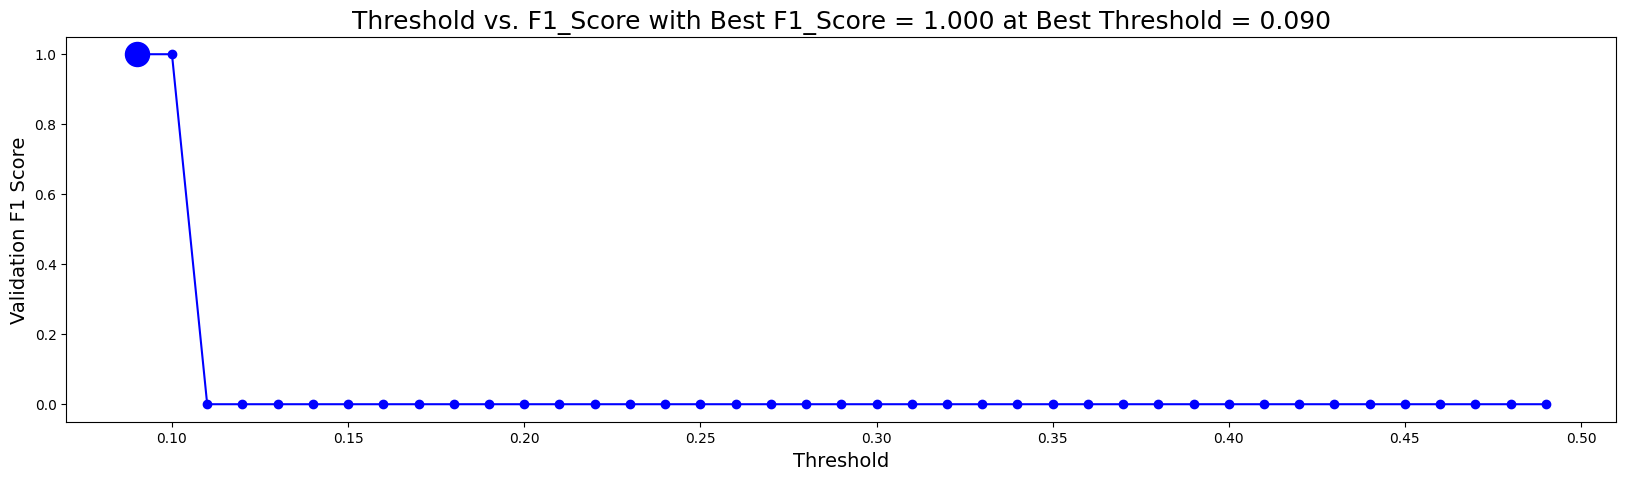

In [472]:
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.09,0.5,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (lgb_oof.reshape((-1)) > threshold).astype('int')
    m = f1_score(train_df['target'].values.reshape((-1)), preds, average='binary')   
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

        
import matplotlib.pyplot as plt

# PLOT THRESHOLD VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. F1_Score with Best F1_Score = {best_score:.3f} at Best Threshold = {best_threshold:.3f}',size=18)
plt.show()

#最佳阈值划分
lgb_pre_train = np.where(lgb_oof>=best_threshold,1,0)
lgb_pre_test= np.where(lgb_test>=best_threshold,1,0)

In [475]:
####################################### 提交结果 #################################
submission = pd.read_csv(r'C:\Users\86130\Desktop\ML算法竞赛\讯飞\水泵状态监测与故障诊断挑战赛公开数据\sample_submit.csv')
submission['target'] = pd.DataFrame(lgb_pre_test)
submission.to_csv(r'C:\Users\86130\Desktop\ML算法竞赛\讯飞\水泵状态监测与故障诊断挑战赛公开数据\sub\sub.csv', index = False)